In [1]:
# This is a tensorlfow implementation for the demonstration of Pendulum experiment of the paper:
# "Adaptive Path-Integral Approach for Representation Learning and Planning of State Space Models"
#
# This code trains the APIAE network ans save weights of the network.

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import Axes3D
import pickle
from datetime import datetime
import scipy.io
from scipy.stats import norm
from networks.apiae import *

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" # will use only the first GPU devices
plt.rcParams.update({'figure.max_open_warning': 0}) # off matplotlib warning

# Fix random seeds
np.random.seed(0)
tf.set_random_seed(0)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Load trainig data
file = open("./data/pendulum.pkl",'rb') # open the file
PendulumData = pickle.load(file) # load data
Xref = PendulumData[0] # load data
temp = Xref.reshape(-1,256) # reshape to compute mean and std
Xmean = np.mean(temp,axis=0).reshape((1,1,1,256)) # compute the mean
Xstd = np.std(temp,axis=0).reshape((1,1,1,256)) # compute the std
Xref = (Xref - Xmean) / Xstd # normalize data

Zref = PendulumData[1] # true pendulum state. only for the analysis
file.close()

In [3]:
# Build APIAE
params = dict(n_x = 16**2, # dimension of x; observation
n_z = 2, # dimension of z; latent space
n_u = 1, # dimension of u; control

K = 10, # the number of time steps
R = 5,# the number of improvements
L = 8, # the number of trajectory sampled

dt = .1, # time interval
ur = .1, # update rate 
lr = 1e-3, # learning rate
learn = 'af', # learning objective: 'a':apiae / 'af': apiae + resampling / i':iwae / 'f':fivo
useIC = True, # use the inference network for control sequence (IC)
)
apiae_net = APIAE(**params)
print('APIAE graph is built.')

# Fix random seeds
np.random.seed(0)
tf.set_random_seed(0)

APIAE graph is built.


In [4]:
# Initialize Dynamics Network
z1_initials = 10*np.random.normal(loc=0.0, scale=1.0, size=(5000,1)) 
z2_initials = 10*np.random.normal(loc=0.0, scale=1.0, size=(5000,1))
z3_initials = 10*np.random.normal(loc=0.0, scale=1.0, size=(5000,1))
Zref_init = np.concatenate([z1_initials, z2_initials], axis = 1)

A_lin = np.array([[0.,1.], [-5.0, -1.0]])
b_lin = np.zeros((params['n_z'],1))
Sigma_init = .01*np.ones((params['n_z'],params['n_u']))

apiae_net.dynNet.initialize(apiae_net.sess, Zref_init, A_lin, b_lin, Sigma_init, minibatchsize=500, training_epochs=500, display_step=100)

Epoch: 0001 loss= 13.809058094
Epoch: 0101 loss= 6.316412115
Epoch: 0201 loss= 2.984364367
Epoch: 0301 loss= 1.014601636
Epoch: 0401 loss= 0.255048642
Epoch: 0500 loss= 0.037878571


In [9]:
# Initializie variables to save the results
saveFile = True
saveInterval = 1000

loss_hist = []
apiae_hist = []
iwae_hist = []
fivo_hist = []
apiaefivo_hist = []

# Load params
K = params['K']
dt = params['dt']
n_x = params['n_x']
n_z = params['n_z']

NBatch= 3000 , minibatchsize= 500 , total_batch= 6
Epoch: 0001 || Bound= -10040105.25 , APIAE= -10221796.25 , IWAE= -10288286.88 , FIVO= -10061387.62 , AFIVO= -10040105.25


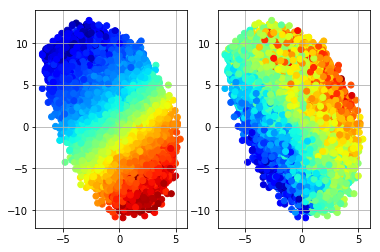

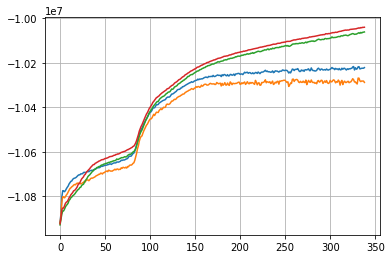

weight saved in ./weights/pendulum_weights.pkl
Epoch: 0011 || Bound= -10032741.50 , APIAE= -10226761.38 , IWAE= -10279392.12 , FIVO= -10056686.62 , AFIVO= -10032741.50
Epoch: 0021 || Bound= -10028702.75 , APIAE= -10223854.25 , IWAE= -10289977.38 , FIVO= -10051861.50 , AFIVO= -10028702.75
Epoch: 0031 || Bound= -10021500.00 , APIAE= -10223204.50 , IWAE= -10285974.25 , FIVO= -10047064.62 , AFIVO= -10021500.00
Epoch: 0041 || Bound= -10017273.12 , APIAE= -10221319.75 , IWAE= -10280892.50 , FIVO= -10039534.75 , AFIVO= -10017273.12
Epoch: 0051 || Bound= -10012006.00 , APIAE= -10232814.88 , IWAE= -10309104.62 , FIVO= -10038261.00 , AFIVO= -10012006.00
Epoch: 0061 || Bound= -10005899.00 , APIAE= -10226542.12 , IWAE= -10302380.38 , FIVO= -10033540.12 , AFIVO= -10005899.00
Epoch: 0071 || Bound= -10000216.12 , APIAE= -10229770.00 , IWAE= -10291332.12 , FIVO= -10028961.25 , AFIVO= -10000216.12
Epoch: 0081 || Bound= -9996438.25 , APIAE= -10227865.50 , IWAE= -10294097.50 , FIVO= -10025467.25 , AFIVO=

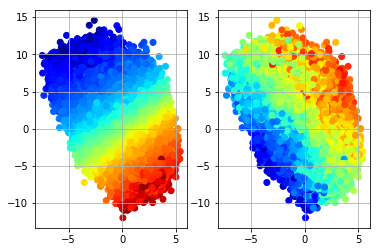

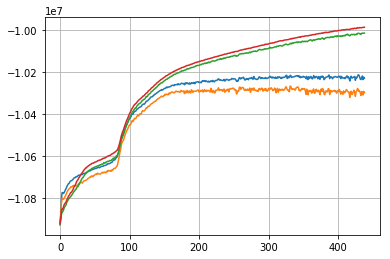

Epoch: 0111 || Bound= -9986323.75 , APIAE= -10232661.88 , IWAE= -10309080.50 , FIVO= -10015716.88 , AFIVO= -9986323.75
Epoch: 0121 || Bound= -9980956.12 , APIAE= -10234139.62 , IWAE= -10306763.88 , FIVO= -10010701.75 , AFIVO= -9980956.12
Epoch: 0131 || Bound= -9977420.62 , APIAE= -10220068.38 , IWAE= -10291612.50 , FIVO= -10006853.75 , AFIVO= -9977420.62
Epoch: 0141 || Bound= -9973351.00 , APIAE= -10227328.88 , IWAE= -10309035.62 , FIVO= -10005718.88 , AFIVO= -9973351.00


In [ ]:
# Set parameters for training
NBatch = Xref.shape[0]
minibatchsize = np.minimum(500,NBatch)
total_batch = int(NBatch/minibatchsize)
print("NBatch=", NBatch, ", minibatchsize=", minibatchsize, ", total_batch=", total_batch)

# Training cycle
training_epochs = 5000
display_interval = 100
for epoch in range(training_epochs+1):
    total_loss = 0.
    total_apiae = 0.
    total_iwae = 0.
    total_fivo = 0.
    total_apiaefivo = 0.
    
    # Loop over all batches
    nperm = np.random.permutation(NBatch)
    museq_batch = []
    Zref_batch = []
    for i in range(total_batch):
        # Fit training using batch data
        minibatch_idx = nperm[i*minibatchsize:(i+1)*minibatchsize]
        batch_xs = Xref[minibatch_idx,:,:,:]

        loss, museq_list, apiae, iwae, fivo, apiaefivo = apiae_net.partial_fit(batch_xs)       
        
        # Compute average loss
        total_loss += loss
        total_apiae += apiae
        total_iwae += iwae
        total_fivo += fivo
        total_apiaefivo += apiaefivo
        
        if epoch % display_interval == 0:
            museq_batch.append(np.reshape(museq_list[-1],(-1,n_z)))
            Zref_reshape = np.reshape(Zref[minibatch_idx,:],(-1,2))
            Zref_batch.append(Zref_reshape)
            
    loss_hist.append(total_loss)
    apiae_hist.append(total_apiae)
    iwae_hist.append(total_iwae)
    fivo_hist.append(total_fivo)
    apiaefivo_hist.append(total_apiaefivo)

    # Display logs per 10 epoch step
    if epoch % 10 == 0:
        print("Epoch:", '%04d' % (epoch+1), 
              "|| Bound=", "{:.2f}".format(-total_loss),
              ", APIAE=", "{:.2f}".format(total_apiae),
              ", IWAE=", "{:.2f}".format(total_iwae),
              ", FIVO=", "{:.2f}".format(total_fivo),
              ", AFIVO=", "{:.2f}".format(total_apiaefivo))
        
    if epoch % display_interval == 0:
        # Show learned latent space
        Zinfer = np.concatenate(museq_batch,axis=0)
        Ztrue = np.concatenate(Zref_batch,axis=0)

        jump=1
        fig, (ax1,ax2) = plt.subplots(1,2)
        Y = (Ztrue[:-1:jump,0]+np.pi) % (2*np.pi) - np.pi
        C = (Y-np.min(Y)) / (np.max(Y) - np.min(Y))
        ax1.scatter(Zinfer[:-1:jump,0],Zinfer[:-1:jump,1], c = C, cmap='jet_r')
        ax1.grid()

        Y = Ztrue[:-1:jump,1]
        C = (Y-np.min(Y)) / (np.max(Y) - np.min(Y))
        ax2.scatter(Zinfer[:-1:jump,0],Zinfer[:-1:jump,1], c = C, cmap='jet_r')
        ax2.grid()
        plt.show()
        
        # Show loss histories
        fig = plt.figure()
        plt.plot(np.array(apiae_hist))
        plt.plot(np.array(iwae_hist))
        plt.plot(np.array(fivo_hist))
        plt.plot(np.array(apiaefivo_hist))
        plt.grid()
        plt.show()
        
    if saveFile and epoch % saveInterval == 0:
        filename = './weights/pendulum_weights.pkl'
        apiae_net.saveWeights(filename)